Epoch 1: current MSE = 422.47740188480714, intercept = 0, slope = 0.
Epoch 2: current MSE = 258.3706104364132, intercept = 4.109912638207691, slope = 1.236781346536487.
Epoch 3: current MSE = 158.0829759196518, intercept = 7.324135577616618, slope = 2.199096002621843.
Epoch 4: current MSE = 96.795294890977, intercept = 9.838163863781096, slope = 2.946877312560078.
Epoch 5: current MSE = 59.34053403272157, intercept = 11.804821747978986, slope = 3.5269767865103647.
Epoch 6: current MSE = 36.450108139921774, intercept = 13.34357647052612, slope = 3.976019482201955.
Epoch 7: current MSE = 22.459977896672015, intercept = 14.54781911821453, slope = 4.322636140517617.
Epoch 8: current MSE = 13.908844576419833, intercept = 15.490556284000991, slope = 4.58920811130657.
Epoch 9: current MSE = 8.681505814478992, intercept = 16.228859404229606, slope = 4.793231413037994.
Epoch 10: current MSE = 5.485359704100239, intercept = 16.807342935965877, slope = 4.948383058213207.
Epoch 11: current MSE = 3

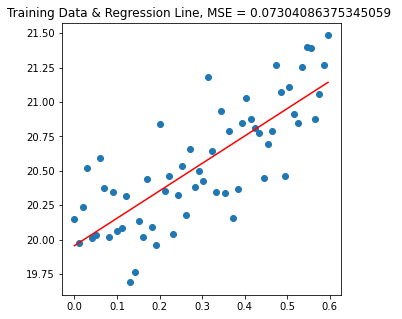

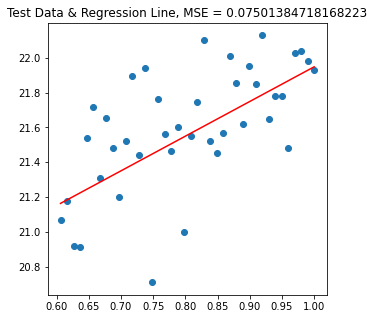

In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5, 5) # ширина, высота в дюймах

class DataModel2D: 
    def __init__(self, x, y):
        self.x = np.array(x)
        self.y = np.array(y)
        
class LinearRegression:
    def __init__(self, num_epochs, l_rate, stop_condition):
        self.epochs = num_epochs
        self.l_rate = l_rate 
        self.intcpt = 0  # intercept
        self.slp = 0  # slope
        self.error = float('inf')
        self.stop_condition = stop_condition  
        
    def mse(self, expected, predicted):
        mse = np.square(np.subtract(expected,predicted)).mean()
        self.error = mse
        return mse
    
    def gradient_slp(self, inputs, expected, predicted):
        g_slp = (-2/inputs.shape[0]) * sum(inputs * (expected - predicted))
        return g_slp
    def gradient_intcpt(self, expected, predicted):
        g_intcpt = np.subtract(expected,predicted).mean() * (-2)
        return g_intcpt  
    
    def learn(self, data_model):
        for i in range(self.epochs):
            predicted = self.slp * data_model.x + self.intcpt

            current_mse = self.mse(data_model.y, predicted)
            print(f"Epoch {i + 1}: current MSE = {current_mse}, intercept = {self.intcpt}, slope = {self.slp}.")

            self.slp -= self.l_rate * self.gradient_slp(data_model.x, data_model.y, predicted)
            self.intcpt -= self.l_rate * self.gradient_intcpt(data_model.y, predicted)

            if current_mse < self.stop_condition:
                print(f"Current MSE is smaller than {self.stop_condition}, exiting learning loop.")
                print(f"Learning process took {i + 1} epochs.")
                break
                
    def predict_single(self, x):
        return self.slp * x + self.intcpt

    def predict(self, x):
        predicted = self.slp * x + self.intcpt
        return DataModel2D(x, predicted)
    

def isFloat(x):
    try:
        float(x)
        return True
    except ValueError:
        False
        
def readCsv(path):
    x = []
    y = []
    with open(path) as f:
        reader = csv.reader(f)
        for row in reader:
            if isFloat(row[1]) and isFloat(row[2]):
                x.append(float(row[1]))
                y.append(float(row[2]))
    return DataModel2D(x, y)


def main():
    training_data = readCsv("lab_1_train.csv")
    lr = LinearRegression(1000, 0.1, 0.01)
    lr.learn(training_data)
    
    td_min_x = min(training_data.x)
    td_max_x = max(training_data.x)
    
    plt.title(f"Training Data & Regression Line, MSE = {lr.error} ")
    f1 = plt.figure(1)
    plt.scatter(training_data.x, training_data.y)
    plt.plot([td_min_x,td_max_x], [lr.predict_single(td_min_x), lr.predict_single(td_max_x)], 'r')
    
    test_data = readCsv("lab_1_test.csv")
    f2 = plt.figure(2)

    predicted_dm = lr.predict(test_data.x)
    test_mse = lr.mse(test_data.y, predicted_dm.y)
    plt.title(f"Test Data & Regression Line, MSE = {lr.error}")
    plt.scatter(test_data.x, test_data.y)
    pred_min_x = min(predicted_dm.x)
    pred_max_x = max(predicted_dm.x)
    plt.plot([pred_min_x, pred_max_x], [lr.predict_single(pred_min_x), lr.predict_single(pred_max_x)], 'r')
    plt.show()
    
if __name__ == "__main__":
    main()